In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [2]:
# # Define a dictionary to specify data types for each column, since we have columns with mixed types
# dtypes = {
#     "AID": str,
#     "Customer_ID": str,
#     "Month": str,
#     "Name": str,
#     "Age": int,
#     "SSN": str,  # Avoid storing actual SSNs, consult privacy regulations
#     "Occupation": str,
#     "Annual_Income": float,
#     "#Monthly_J": float,  # Assuming typo in header, correct data type is float
#     "Num_Bank_Account": int
# }

# Load the data, specifying the data types
train_data = pd.read_csv("/kaggle/input/credit-score-classification/train.csv",low_memory=False)#low_memory=False lets pandas read the entire data at once and then assign data type to cols
# Load the testing data
test_data = pd.read_csv("/kaggle/input/credit-score-classification/test.csv",low_memory=False)

train_data.head() #viewing the top few entries 
#df.dtypes
#df.columns
#df.info()
# test_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
test_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [4]:
# Check for missing values
#print('Before Refining--','\n',train_data.isnull().sum())  # This will print the number of missing values in each column

# Handle missing values (replace with mean/median, drop rows/columns)
train_data.fillna({"Name": "Unknown","Type_of_Loan":"Unknown","Credit_History_Age":"Unknown"}, inplace=True)  # Fills missing values in Name,Type_of_Loan with "Unknown". inplace means no separate obj created
#train_data.fillna({"Monthly_Inhand_Salary":train_data["Monthly_Inhand_Salary"].mean(),"Num_Credit_Inquiries":train_data["Num_Credit_Inquiries"].mean()}, inplace=True) #filling with means
#train_data.fillna({"Num_of_Delayed_Payment":"Unknown","Amount_invested_monthly":'Unknown',"Monthly_Balance":'Unknown'},inplace=True) #setting the null values of cols with string/mixed types as N/A
train_data.dropna(subset=["Num_of_Delayed_Payment","Credit_History_Age","Amount_invested_monthly","Monthly_Balance"],inplace=True) #dropping the null rows of cols with mixed types


#making things better, handling data types of all numerical cols
num_cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

train_data[num_cols]=train_data[num_cols].apply(pd.to_numeric,errors="coerce") #changing all to numeric
train_data.fillna({"Age":train_data["Age"].mean()}, inplace=True)

#print(print('After Refining--','\n',train_data.isnull().sum()))

##-----------
# num_cols=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
#        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
#        'Num_Credit_Inquiries', 'Outstanding_Debt',
#        'Credit_Utilization_Ratio', 'Total_EMI_per_month',
#        'Amount_invested_monthly', 'Monthly_Balance']

# df[num_cols]=df[num_cols].apply(pd.to_numeric,errors="coerce")

# df["Age"].fillna(df["Age"].mean(), inplace=True)
# print(print('After Refining--','\n',train_data.isnull().sum()))
##-------------

# # DO ONLY TO IMPROVE EFFICIENCY----
# # Check for outliers (using IQR-Interquartile Range)
# # Example using interquartile range (IQR) for Age:
# Q1 = train_data["Age"].quantile(0.25) 
# Q3 = train_data["Age"].quantile(0.75)
# IQR = Q3 - Q1 #extent of middle 50% data

# # Identify outliers based on IQR (consider removing or winsorizing)
# outliers_age = train_data[(train_data["Age"] < (Q1 - 1.5 * IQR)) | (train_data["Age"] > (Q3 + 1.5 * IQR))]
# print(outliers_age)
# # You can decide to remove outliers or use winsorization (capping values to IQR boundaries)
# #------

train_data.head()
test_data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


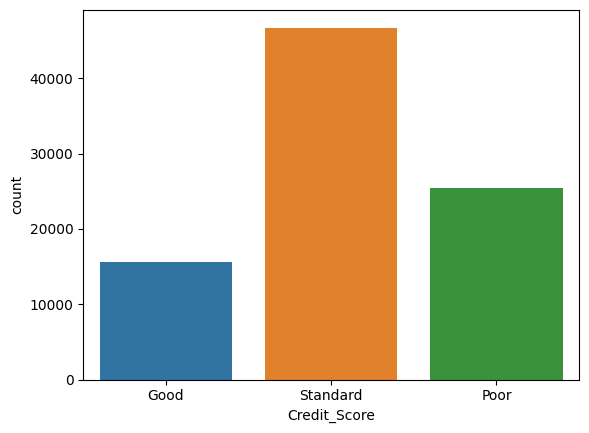

In [5]:
# Explore data distribution and relationships with target variable (credit score)
# Use techniques like histograms, boxplots, scatter plots
import matplotlib.pyplot as plt

sns.countplot(data=train_data,x="Credit_Score")
plt.show()
# # Distribution of Annual Income
# annual_income_data=train_data["Annual_Income"]
# plt.hist(annual_income_data)
# plt.xlabel("Annual Income")
# plt.ylabel("Frequency")
# plt.show()

# # ... explore other features and relationships with credit score

In [6]:
train_data["Occupation"].replace("_______","Others",inplace=True) #bcs some Occupations were _______

/tmp/ipykernel_79/4124791511.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Occupation"].replace("_______","Others",inplace=True) #bcs some Occupations were _______


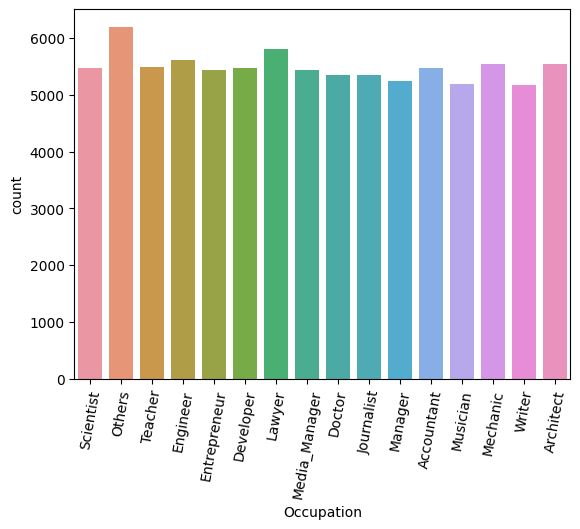

In [7]:
sns.countplot(x=train_data["Occupation"])
plt.xticks(rotation=80)
plt.show()

In [8]:
train_data["Occupation"].value_counts()

Occupation
Others           6193
Lawyer           5807
Engineer         5605
Mechanic         5549
Architect        5540
Teacher          5486
Scientist        5476
Developer        5474
Accountant       5463
Media_Manager    5443
Entrepreneur     5433
Doctor           5349
Journalist       5342
Manager          5248
Musician         5192
Writer           5174
Name: count, dtype: int64

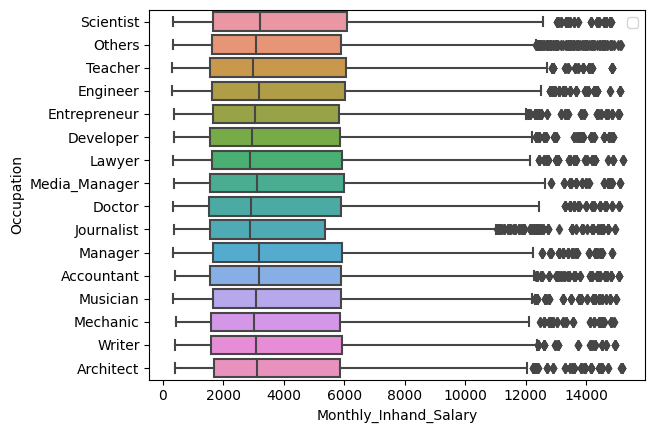

In [9]:
sns.boxplot(train_data,y="Occupation",x="Monthly_Inhand_Salary") #helps see outliers
plt.legend()
plt.show()

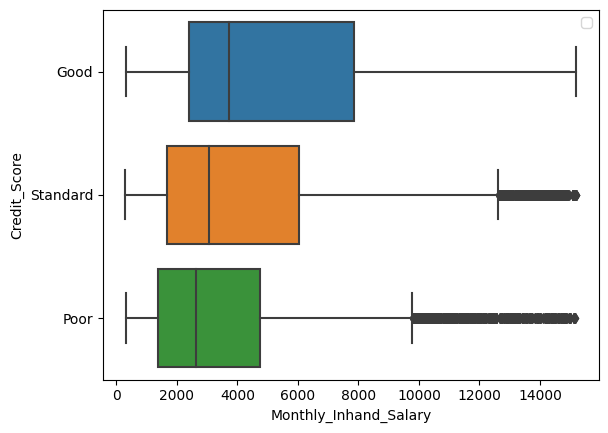

In [10]:
sns.boxplot(train_data,y="Credit_Score",x="Monthly_Inhand_Salary")
plt.legend()
plt.show()

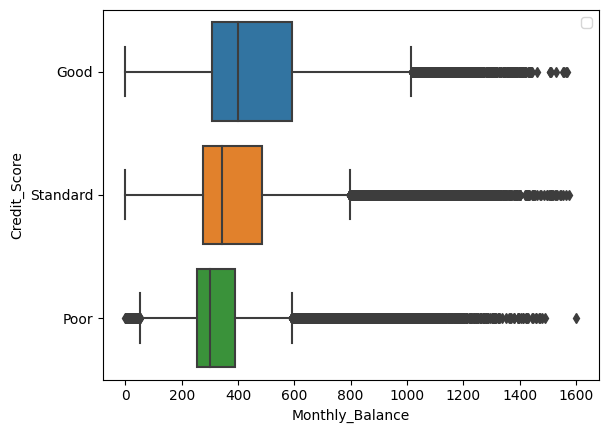

In [11]:
train_data.fillna({"Monthly_Inhand_Salary":np.mean(train_data["Monthly_Inhand_Salary"]),"Num_of_Delayed_Payment":30,"Changed_Credit_Limit":10,"Num_Credit_Inquiries":28,"Outstanding_Debt":1426,"Amount_invested_monthly":195,"Monthly_Balance":402,"Num_of_Loan":3}, inplace=True)
#inserted estimated no.s to fit in, to avoid other data types

sns.boxplot(train_data,y="Credit_Score",x="Monthly_Balance")
plt.legend()
plt.show()

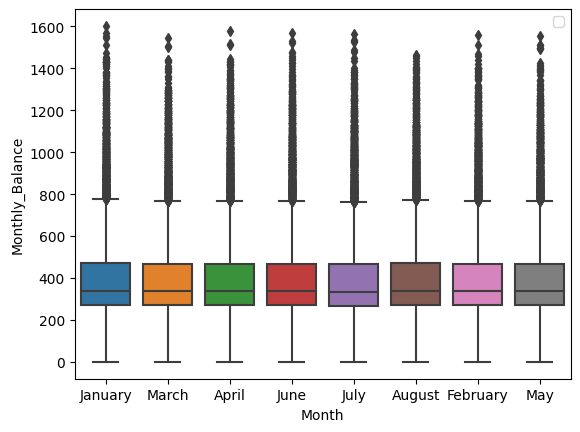

In [12]:
#train_data[["Month","Monthly_Balance"]]=train_data[["Month","Monthly_Balance"]].apply(pd.to_numeric,errors="coerce")
sns.boxplot(train_data,x="Month",y="Monthly_Balance")
plt.legend()
plt.show()

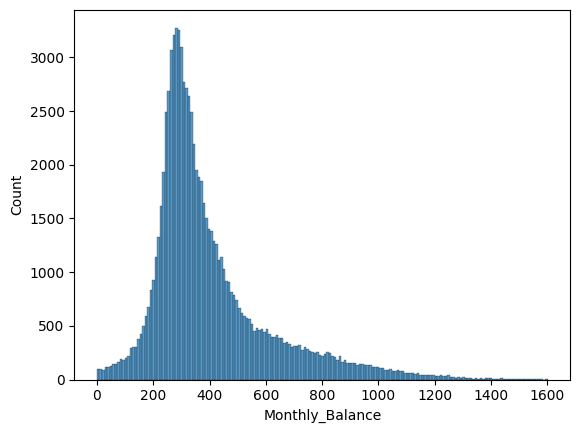

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.histplot(train_data["Monthly_Balance"])
plt.show()

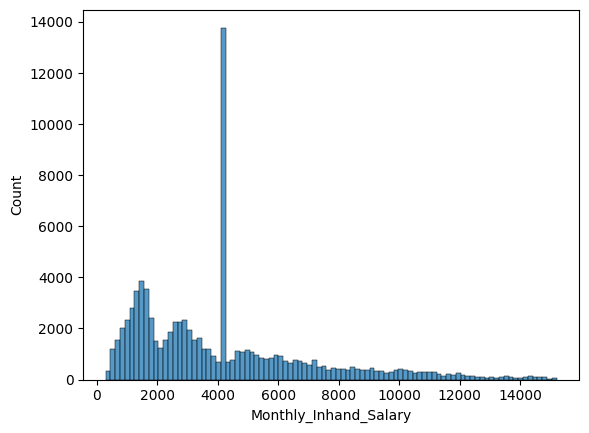

In [14]:
sns.histplot(train_data["Monthly_Inhand_Salary"])
plt.show()

In [15]:
# sns.pairplot(data=train_data)
# plt.show()

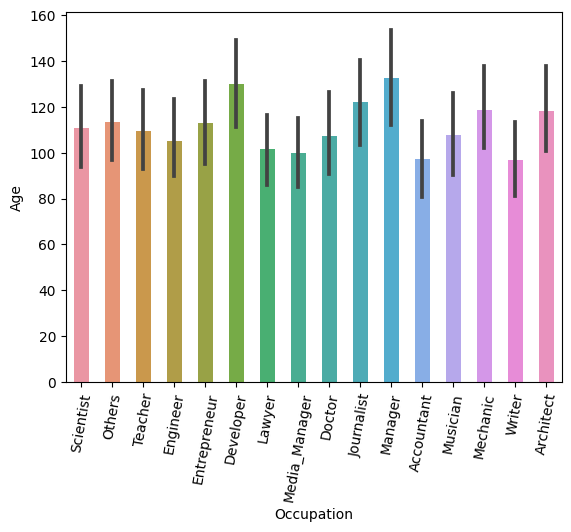

In [16]:
sns.barplot(train_data,x='Occupation',y='Age',width=0.5)
plt.xticks(rotation=80)
plt.show()
#clearly, this plot shows somwthing is wrong with ages, follow to correct

In [17]:
train_data["Age"].mean()

111.42627390824984

In [18]:
#since we got very high avg above, means we have outliers, we can replace them by:
# Check for outliers (using IQR-Interquartile Range)
# Example using interquartile range (IQR) for Age:
Q1 = train_data["Age"].quantile(0.25) 
Q3 = train_data["Age"].quantile(0.75)
IQR = Q3 - Q1 #extent of middle 50% data

# Identify outliers based on IQR (consider removing or winsorizing)
outliers_age = train_data[(train_data["Age"] < (Q1 - 1.5 * IQR)) | (train_data["Age"] > (Q3 + 1.5 * IQR))]
#print(outliers_age)

#these can be removed easily, setting them to 50:
train_data.loc[train_data['Age'] <= (Q1 - 1.5 * IQR), 'Age'] = 50
train_data.loc[train_data['Age'] >= (Q3 + 1.5 * IQR), 'Age'] = 50

In [19]:
train_data["Age"].mean()

34.57021441429125

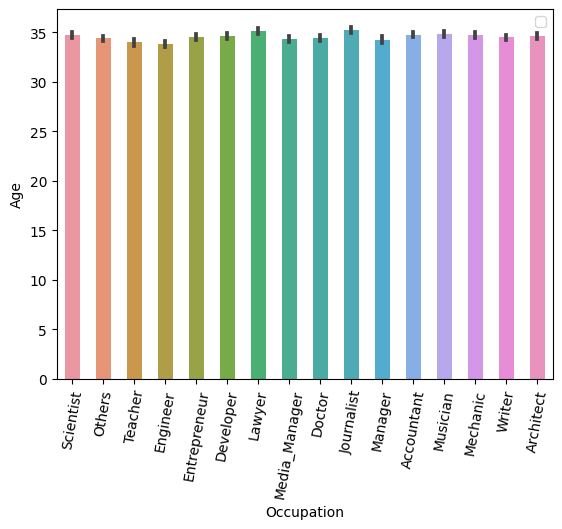

In [20]:
#plot again
sns.barplot(train_data,x='Occupation',y='Age',width=0.5)
plt.xticks(rotation=80)
plt.legend()
plt.show()

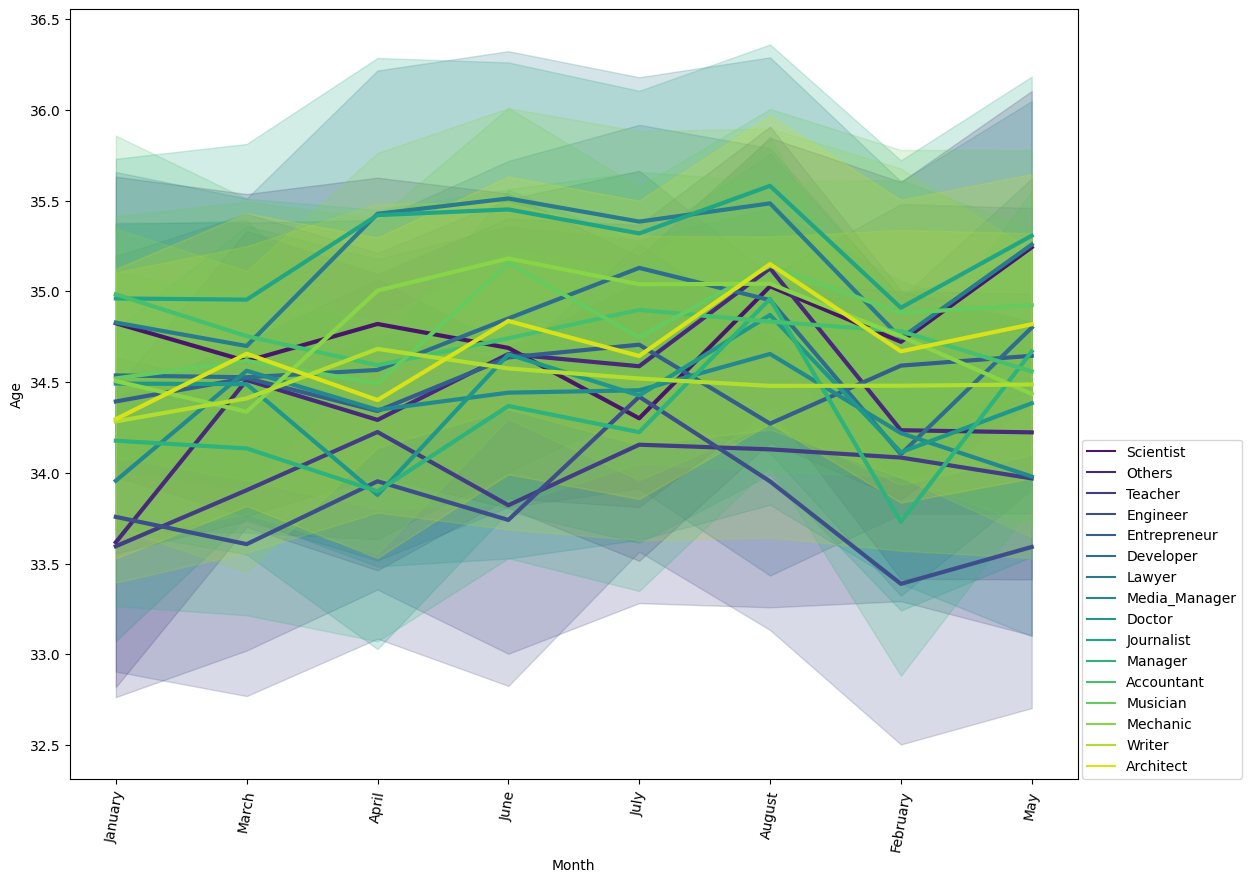

In [21]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(13,10))
sns.lineplot(train_data,x='Month',y='Age', hue="Occupation",palette="viridis", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

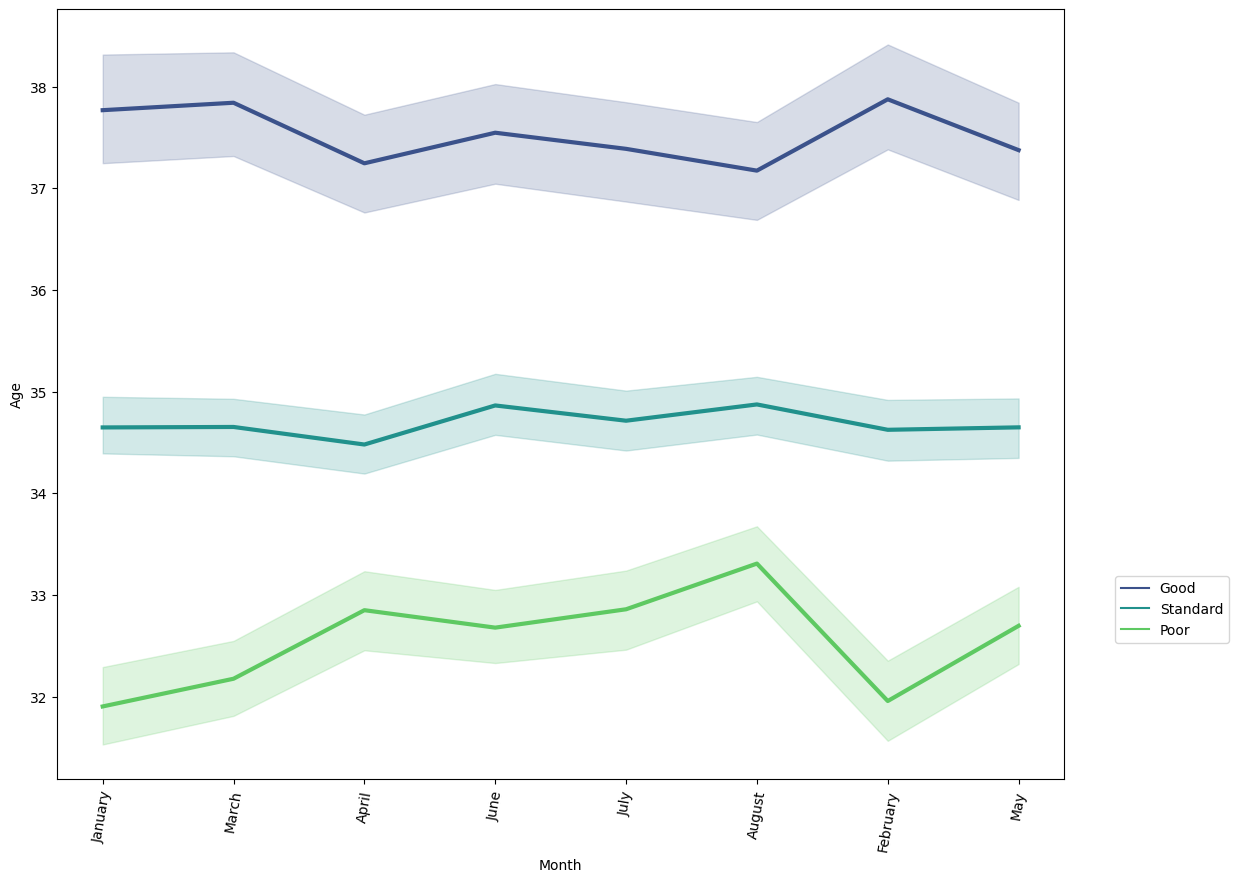

In [22]:
plt.figure(figsize=(13,10))
sns.lineplot(train_data,x='Month',y='Age', hue="Credit_Score",palette="viridis", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

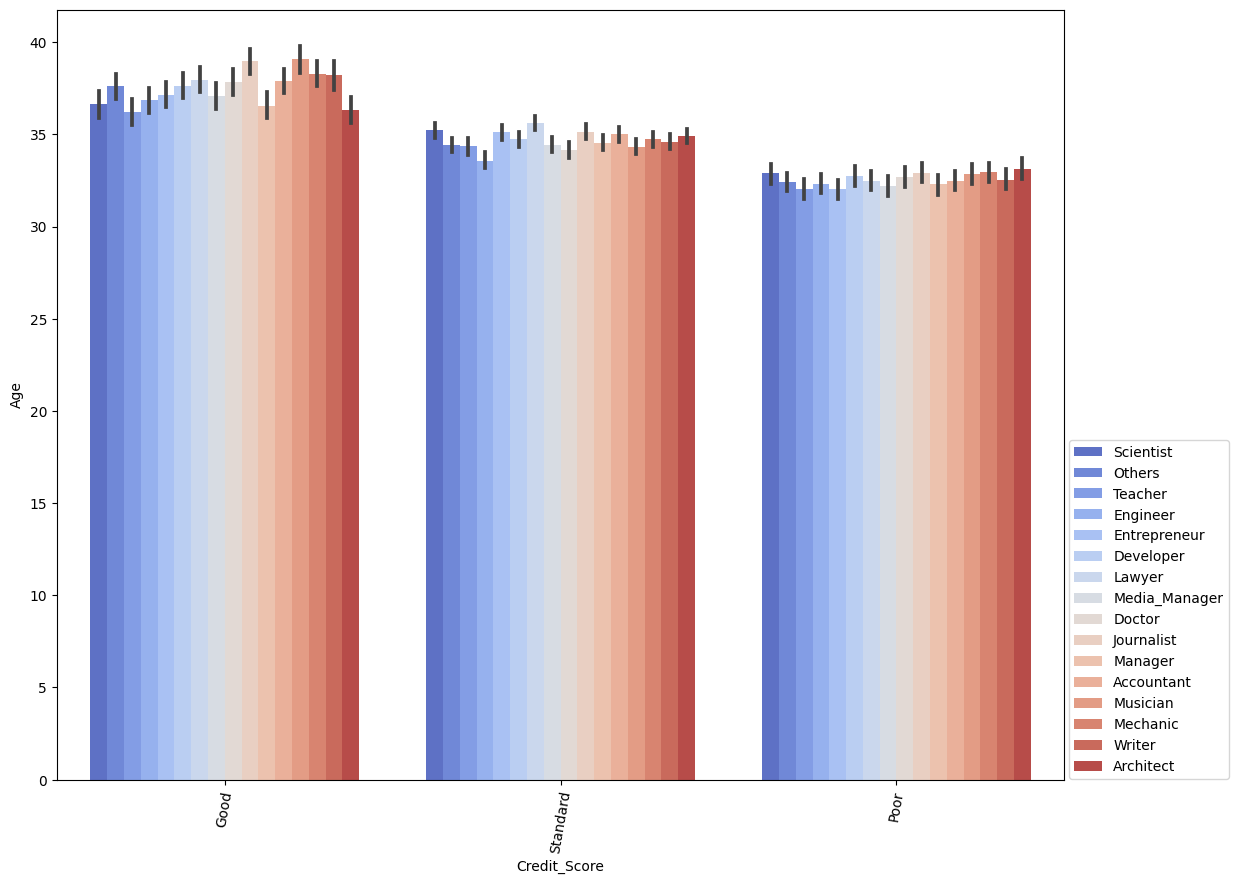

In [23]:
plt.figure(figsize=(13,10))
sns.barplot(train_data,x='Credit_Score',y='Age', hue="Occupation",palette="coolwarm", linewidth=3)
plt.xticks(rotation=80)
plt.legend(loc="right",bbox_to_anchor=(0.67, 0., 0.5, 0.442))
plt.show()

<Axes: >

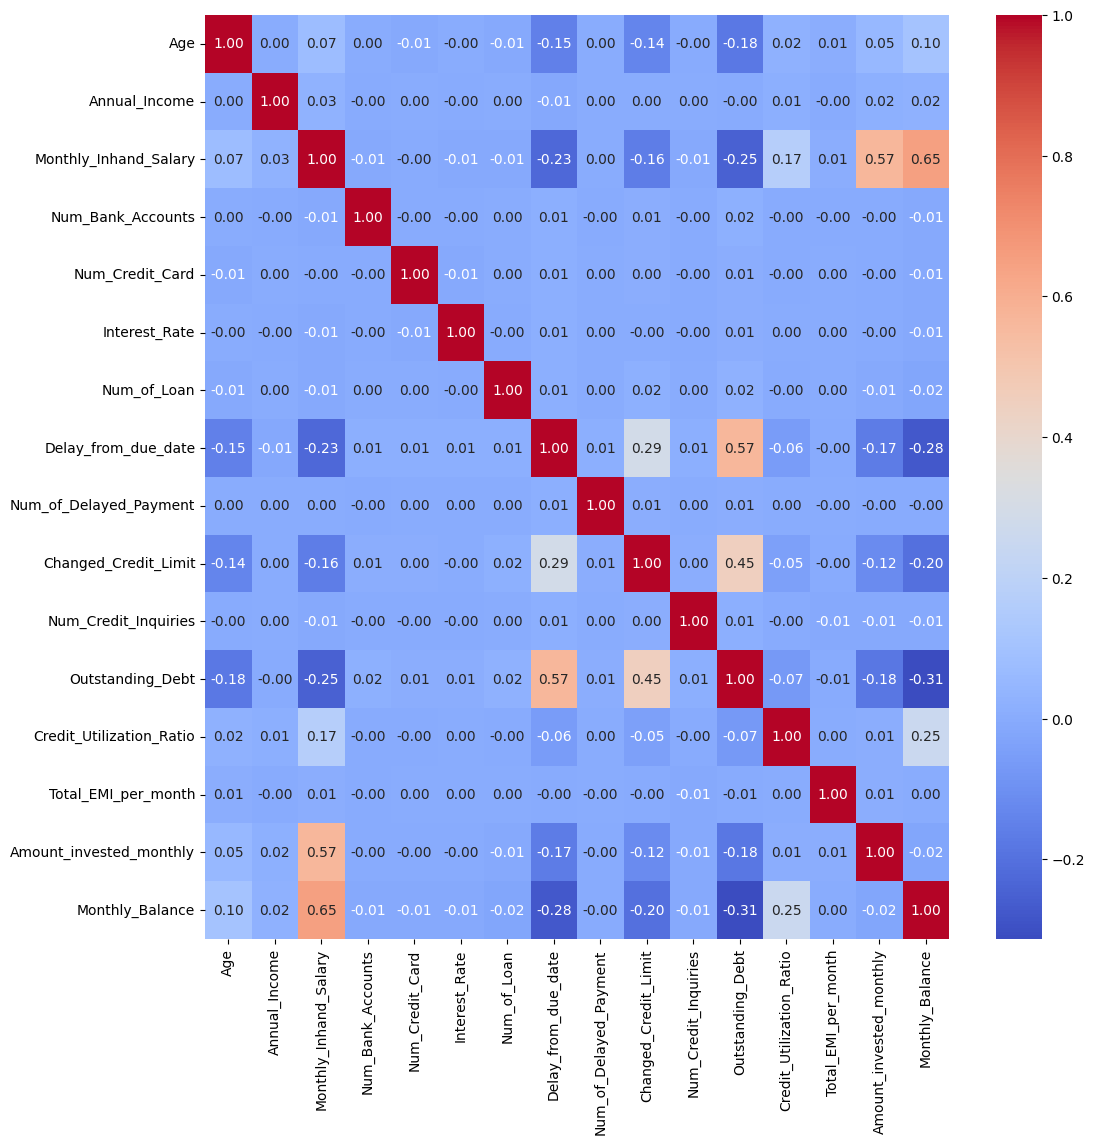

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data[num_cols].corr(), annot=True, fmt='.2f', cmap="coolwarm") #generates a correlation matrix bw all numerical cols

In [25]:
train_data.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,50.0,821-00-0265,Scientist,19114.12,4153.176515,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4153.176515,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good


In [26]:
train_data["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [27]:
train_data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [28]:
train_data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [29]:
train_data['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [30]:
#two methods can be used to hot encode above values:
# #Method1: better bcs keeps no. of features same
# df['Credit_Score'] = df['Credit_Score'].map({'Good':0,'Standard':1,'Poor':2})
# df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8})
# df['Credit_Mix'] = df['Credit_Mix'].map({'_':0, 'Good':1, 'Standard':2, 'Bad':3})
# df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'No':0, 'NM':0, 'Yes':1})
# df['Payment_Behaviour'] = df['Payment_Behaviour'].map({'High_spent_Small_value_payments':4,
#        'Low_spent_Large_value_payments':2,
#        'Low_spent_Medium_value_payments':1,
#        'Low_spent_Small_value_payments':0,
#        'High_spent_Medium_value_payments':5, '!@9#%8':7,
#        'High_spent_Large_value_payments':6})



# Method2: Using OneHotEncoder, avoids doing manually
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cols=["Occupation","Month","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"]#dont encode Credit_Score here bcs target to be separated before other encoding other cols.
cols_encoded = encoder.fit_transform(train_data[cols])
test_cols_encoded=encoder.transform(test_data[cols])
# This creates new columns for each unique occupation

#Add the encoded occupation features back to the DataFrame
train_data = pd.concat([train_data.reset_index(drop=True), pd.DataFrame(cols_encoded, columns=encoder.get_feature_names_out())], axis=1)
test_data = pd.concat([test_data.reset_index(drop=True), pd.DataFrame(test_cols_encoded, columns=encoder.get_feature_names_out())], axis=1)

# Drop the original columns after encoding and concatenation
train_data.drop(cols, axis=1, inplace=True)
test_data.drop(cols, axis=1, inplace=True)

# #Method3
# dfd = pd.get_dummies(df,columns=['Occupation'],drop_first=True)


In [31]:
train_data.columns

Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Others', 'Occupation_Scientist',
       'Occupation_Teacher', 'Occupation_Writer', 'Month_April',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'M

In [32]:
train_data.shape

(87774, 61)

In [33]:
test_data.columns  

Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Others', 'Occupation_Scientist',
       'Occupation_Teacher', 'Occupation_Writer', 'Month_April',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May

In [34]:
test_data.shape

(50000, 60)

#The columns that are present only in one of the two lists are:

Credit_Score
Credit_Score_Good
Credit_Score_Poor
Credit_Score_Standard
Credit_Score_nan
Credit_Mix_nan
Month_April
Month_August
Month_December
Month_February
Month_January
Month_July
Month_June
Month_March
Month_May
Month_November
Month_October
Month_September
Month_nan
Payment_Behaviour_nan
Payment_of_Min_Amount_nan ​
(Can check)

In [35]:
#since no. of cols in x_test and x_train have to be same, we need to adjust
# Ensure the same columns are present in both train and test data
missing_cols1 = set(train_data.columns) - set(test_data.columns)
missing_cols2 = set(test_data.columns) - set(train_data.columns)
for col in missing_cols1:
    test_data[col] = 0
for coll in missing_cols2:
    train_data[coll]=0
test_data = test_data[train_data.columns.drop('Credit_Score')] #credit score needs to be dropped from test_data

In [36]:
train_data.shape

(87774, 61)

In [37]:
test_data.shape

(50000, 60)

In [38]:
#if not handled, further code gives error, it means we have some cols that have categories and thus we are unable to apply random forest
#lets find out who are they
categorical_cols = train_data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan',
       'Credit_History_Age', 'Credit_Score'],
      dtype='object')


In [39]:
#since many are not useful, we can simply drop them 
#Note: Credit_History_Age and Type_of_Loan are not vague, but since they can have a lot of hot encodings, we can drop them
cols_to_exclude=["ID","Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"]
train_data.drop(cols_to_exclude, axis=1, inplace=True)
#test_data.drop(cols_to_exclude, axis=1, inplace=True)


In [40]:
train_data.select_dtypes(include=['object']).columns

Index(['Credit_Score'], dtype='object')

In [41]:
test_data.select_dtypes(include=['object']).columns

Index(['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age',
       'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [42]:
y=train_data["Credit_Score"]
x=train_data.drop("Credit_Score",axis=1)
#x = train_data.drop(['Credit_Score','Type_of_Loan','SSN','Credit_History_Age','Num_of_Delayed_Payment'],axis=1)#dropping all these bcs they may have str types, which will create problem for our models

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.20,random_state=42) #splits the data into test and train, test=20%

In [44]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.50, random_state=42) #50% of test=cv set

In [45]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier #From the XGBoost library, a powerful and efficient gradient boosting algorithm often achieving high accuracy.
from lightgbm import LGBMClassifier #From the LightGBM library, another high-performance gradient boosting algorithm known for speed and memory efficiency.
from catboost import CatBoostClassifier #From the CatBoost library, a gradient boosting algorithm specifically designed for categorical features.
from sklearn.ensemble import GradientBoostingClassifier #A more general gradient boosting implementation from scikit-learn.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline #Creates a simple pipeline with one preprocessing step followed by a classifier.
from sklearn.pipeline import Pipeline #Allows for more complex pipelines with multiple preprocessing steps or combining different models.
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score

In [46]:
# Initialize HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()

# Fit the classifier on training data
clf.fit(X_train, y_train)

# Predict and score on test data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7332801640651704


In [47]:
cbc = CatBoostClassifier()
cbcmodel = cbc.fit(X_train,y_train, verbose=False)
print("Accuracy: ",end='')
cbcmodel.score(X_test,y_test)

Accuracy: 

0.7413694884356842

In [48]:
lgb = LGBMClassifier()
lgbmodel = lgb.fit(X_train,y_train)
print("Accuracy: ")
lgbmodel.score(X_test,y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3739
[LightGBM] [Info] Number of data points in the train set: 70219, number of used features: 54
[LightGBM] [Info] Start training from score -1.729497
[LightGBM] [Info] Start training from score -1.238047
[LightGBM] [Info] Start training from score -0.629841
Accuracy: 


0.7270137860316737

The algos below can't handle NaN values, so they give error. So, we create a pipeline using Imputer to replace all NaNs with means

In [49]:
# rf = RandomForestClassifier() THIS GIVES ERROR
# rf.fit(X_train, y_train)
# rf.score(X_test,y_test)

In [50]:
from sklearn.impute import SimpleImputer

# Example pipeline with imputation and RandomForestClassifier
pipeline = Pipeline(steps=[ #replaces all NaN values in the test and train set 
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Score on test data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: ",accuracy)
y_pred_randomforest=pipeline.predict(X_test)

Accuracy:  0.7600546883901105


In [51]:
# gbc = GradientBoostingClassifier() THIS GIVES SAME ERROR
# gbcmodel = gbc.fit(X_train,y_train)
# xgbmodel.score(X_test,y_test)

In [52]:
pipeline = Pipeline(steps=[ #replaces all NaN values in the test and train set 
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', GradientBoostingClassifier())
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Score on test data
accuracy = pipeline.score(X_test, y_test)
print("Accuracy: ",accuracy)

Accuracy:  0.7054802324256579


In [53]:
pipe = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler(), RandomForestClassifier()) #using min max norm
pipe.fit(X_train, y_train)
#Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),('RandomForestClassifier', RandomForestClassifier())])
accuracy = pipe.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.7624473054574455


In [54]:
# xgb = XGBClassifier() THIS RAISES AN ERROR
# xgbmodel = xgb.fit(X_train,y_train)
# xgbmodel.score(X_test,y_test)

Above code gives error: ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Good' 'Poor' 'Standard'] 
because XGB expects as [0,1,2] , so we use LabelEncoder to convert categoric labels to numeric as below:

In [55]:
from sklearn.preprocessing import LabelEncoder

# Example converting categorical labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb = XGBClassifier()
xgbmodel = xgb.fit(X_train, y_train_encoded)
accuracy = xgbmodel.score(X_test, y_test_encoded)
print("Accuracy: ", accuracy)

Accuracy:  0.7452432494018457


<Axes: >

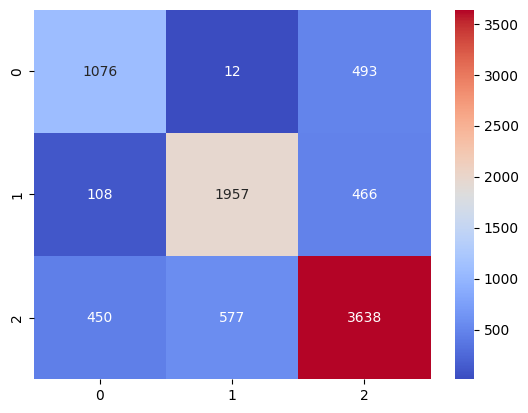

In [56]:
y_predrfc = y_pred_randomforest #using the random forest prediction  since that gave best accuracy
sns.heatmap(confusion_matrix(y_test,y_predrfc), annot=True, fmt='.0f',cmap='coolwarm')

**BEGIN FROM HERE-----------------------------------------------------**

In [57]:
from sklearn.preprocessing import LabelEncoder

# Example converting categorical labels to numeric labels
label_encoder = LabelEncoder()
y_train_encodedd = label_encoder.fit_transform(y_train)
y_val_encodedd = label_encoder.transform(y_val)

X=np.asarray(X_train).astype(np.float32)
Y=np.asarray(y_train_encodedd).astype(np.float32)
X_val=np.asarray(X_val).astype(np.float32)
Y_val=np.asarray(y_val_encodedd).astype(np.float32)

In [58]:
import tensorflow as tf
from sklearn.metrics import classification_report

2024-07-10 02:25:18.410024: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 02:25:18.410136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 02:25:18.558171: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [59]:
X.shape

(70219, 54)

In [60]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(54,)))

model.add(tf.keras.layers.Dense(1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3)) #30% of neurons dropped randomly
tf.keras.layers.BatchNormalization()

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(3, activation="softmax"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [61]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [62]:
# results = model.fit(X, Y, epochs = 100, callbacks=[es], validation_data=(X_val, y_val_encodedd)) #takes lot of time

In [63]:
# model.evaluate(X, Y) #gives bad accuracy

Clearly, Neural Network gives bad accuracy

Let's now move towards creating a **DecisionTree Classifier**

In [86]:
from sklearn.tree import DecisionTreeClassifier


In [135]:
from sklearn.impute import SimpleImputer

# Example pipeline with imputation and DecisionTree Classifier
pipeline = Pipeline(steps=[ #replaces all NaN values in the test and train set 
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier(random_state=1234,max_depth=10)) #adjust the max depth parameter for better metric results(eg: 10>none)
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)


y_pred_dt_cv=pipeline.predict(X_val) #storing the predictions on cv set



In [136]:
# Accuracy Score on train data
print("Accuracy on Train Set: ",pipeline.score(X_train, y_train))

Accuracy on Train Set:  0.7278087127415657


In [137]:
warnings.filterwarnings("ignore", message="X does not have valid feature names") #removing a potential warning

# Accuracy Score on cv data
dt_accuracy = pipeline.score(X_val, y_val)
print("Accuracy on CV set: ",dt_accuracy)

Accuracy on CV set:  0.709045340624288


In [138]:
#Precision
from sklearn.metrics import precision_score
print("Precision on CV set: ",precision_score(y_val,y_pred_dt_cv,average='weighted'))

Precision on CV set:  0.7129956610206718


In [139]:
#Recall
from sklearn.metrics import recall_score
print("Recall on CV set: ",recall_score(y_val,y_pred_dt_cv,average='weighted'))

Recall on CV set:  0.709045340624288


In [140]:
#F1 score
from sklearn.metrics import f1_score
print("F1 score on CV set: ",f1_score(y_val,y_pred_dt_cv,average='weighted'))

F1 score on CV set:  0.7097308935665038


In [141]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val,y_pred_dt_cv)
conf_matrix

array([[1037,   48,  464],
       [ 161, 1659,  736],
       [ 586,  559, 3528]])

Let's try out hypertuning the parameters using RandomizedSearchCV 

In [151]:
param_grid = {
    'classifier__max_depth': [10,15,20], 
    'classifier__min_samples_split': [2, 5, 8],   
    'classifier__min_samples_leaf': [1, 2, 4]      
}

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
# Example pipeline with imputation and Random Search
pipeline = Pipeline(steps=[ #replaces all NaN values in the test and train set 
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', DecisionTreeClassifier(random_state=1234)) 
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='f1_weighted', random_state=1234)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                             ('classifier',
                                              DecisionTreeClassifier(random_state=1234))]),
                   param_distributions={'classifier__max_depth': [10, 15, 20],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          8]},
                   random_state=1234, scoring='f1_weighted')

In [154]:
print(random_search.best_params_)

{'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': 10}


In [155]:
final_model=random_search.best_estimator_

In [159]:
y_dt_rs_pred = final_model.predict(X_val)

In [160]:
accuracy = accuracy_score(y_val, y_dt_rs_pred)
precision = precision_score(y_val, y_dt_rs_pred,average='weighted')
recall = recall_score(y_val, y_dt_rs_pred , average='weighted')
f1 = f1_score(y_val, y_dt_rs_pred ,average='weighted')
conf_matrix = confusion_matrix(y_val, y_dt_rs_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7098427887901572
Precision: 0.713776275553277
Recall: 0.7098427887901572
F1 Score: 0.7106149451022624
Confusion Matrix:
[[1036   48  465]
 [ 160 1671  725]
 [ 586  563 3524]]


Finally, lets run the decision tree on test set

In [162]:
y_test_pred=final_model.predict(X_test)

In [164]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred,average='weighted')
recall = recall_score(y_test, y_test_pred , average='weighted')
f1 = f1_score(y_test, y_test_pred ,average='weighted')
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("FINAL TEST RESULTS:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

FINAL TEST RESULTS:
Accuracy: 0.7083285860772474
Precision: 0.7139524688816209
Recall: 0.7083285860772474
F1 Score: 0.7097471493686711
Confusion Matrix:
[[1063   41  477]
 [ 169 1676  686]
 [ 637  550 3478]]
